In [23]:
!pip install dill

  Stored in directory: C:\Users\Hp\AppData\Local\pip\Cache\wheels\27\4b\a2\34ccdcc2f158742cfe9650675560dea85f78c3f4628f7daad0
Successfully built dill


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.metrics import mean_squared_error
from hypopt import GridSearch
import xgboost
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import cross_val_score,cross_val_predict, KFold,train_test_split,GridSearchCV,RandomizedSearchCV

In [2]:
na_value=['',' ','nan','Nan','NaN','na']
train=pd.read_csv('./train.csv',na_values=na_value)
store=pd.read_csv('./store.csv',na_values=na_value)
test=pd.read_csv('./test.csv',na_values=na_value)

C:\Users\Hp\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [68]:
store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [69]:
test.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


In [70]:
print("Shape of the Dataset:",train.shape)

Shape of the Dataset: (1017209, 9)


In [3]:
df_new = train.merge(store,on=["Store"], how="inner")
df_test=test.merge(store,on=["Store"], how="inner")
print(df_new.shape)

(1017209, 18)


In [72]:
print("Distinct number of Stores :", len(df_new["Store"].
unique()))
print("Distinct number of Days :", len(df_new["Date"].
unique()))
print("Average daily sales of all stores : ",round(df_new
["Sales"].mean(),2))

Distinct number of Stores : 1115
Distinct number of Days : 942
Average daily sales of all stores :  5773.82


In [73]:
df_new.dtypes

Store                          int64
DayOfWeek                      int64
Date                          object
Sales                          int64
Customers                      int64
Open                           int64
Promo                          int64
StateHoliday                  object
SchoolHoliday                  int64
StoreType                     object
Assortment                    object
CompetitionDistance          float64
CompetitionOpenSinceMonth    float64
CompetitionOpenSinceYear     float64
Promo2                         int64
Promo2SinceWeek              float64
Promo2SinceYear              float64
PromoInterval                 object
dtype: object

In [63]:
df_new.StateHoliday.replace({'0':0},inplace=True)
df_new.StateHoliday.unique()

array([0, 'a', 'b', 'c'], dtype=object)

working with time

In [74]:
df_new

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,1,4,2015-07-30,5020,546,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2,1,3,2015-07-29,4782,523,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,1,2,2015-07-28,5011,560,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
4,1,1,2015-07-27,6102,612,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1115,6,2013-01-05,4771,339,1,0,0,1,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
1017205,1115,5,2013-01-04,4540,326,1,0,0,1,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
1017206,1115,4,2013-01-03,4297,300,1,0,0,1,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
1017207,1115,3,2013-01-02,3697,305,1,0,0,1,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"


In [4]:
class DateTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    def fit(self, X, y=None):
        return self

    def transform(self,X):
        X['Date'] = pd.to_datetime(X['Date'], infer_datetime_format=True)
        X["Month"] = X["Date"].dt.month
        X["Quarter"] = X["Date"].dt.quarter
        X["Year"] = X["Date"].dt.year
        X["Day"] = X["Date"].dt.day
        X["Week"] = X["Date"].dt.week
        X["Season"] = np.where(X["Month"].isin([3,4,5]),"Spring",
        np.where(X["Month"].isin([6,7,8]),"Summer",np.where(X["Month"].isin
            ([9,10,11]),"Fall",np.where(X["Month"].isin([12,1,2]),"Winter","None"))))
        return X
simple_features = Pipeline([
    ('dst', DateTransformer()),
])
df=simple_features.fit_transform(df_new)

In [79]:
df_new

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Month,Quarter,Year,Day,Week,Season
0,1,5,2015-07-31,5263,555,1,1,0,1,c,...,0,NaN,NaN,NaN,7,3,2015,31,31,Summer
1,1,4,2015-07-30,5020,546,1,1,0,1,c,...,0,NaN,NaN,NaN,7,3,2015,30,31,Summer
2,1,3,2015-07-29,4782,523,1,1,0,1,c,...,0,NaN,NaN,NaN,7,3,2015,29,31,Summer
3,1,2,2015-07-28,5011,560,1,1,0,1,c,...,0,NaN,NaN,NaN,7,3,2015,28,31,Summer
4,1,1,2015-07-27,6102,612,1,1,0,1,c,...,0,NaN,NaN,NaN,7,3,2015,27,31,Summer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1115,6,2013-01-05,4771,339,1,0,0,1,d,...,1,22.0,2012.0,"Mar,Jun,Sept,Dec",1,1,2013,5,1,Winter
1017205,1115,5,2013-01-04,4540,326,1,0,0,1,d,...,1,22.0,2012.0,"Mar,Jun,Sept,Dec",1,1,2013,4,1,Winter
1017206,1115,4,2013-01-03,4297,300,1,0,0,1,d,...,1,22.0,2012.0,"Mar,Jun,Sept,Dec",1,1,2013,3,1,Winter
1017207,1115,3,2013-01-02,3697,305,1,0,0,1,d,...,1,22.0,2012.0,"Mar,Jun,Sept,Dec",1,1,2013,2,1,Winter


In [12]:
df_new['Date'] = pd.to_datetime(df_new['Date'], infer_datetime_format=True)
df_new["Month"] = df_new["Date"].dt.month
df_new["Quarter"] = df_new["Date"].dt.quarter
df_new["Year"] = df_new["Date"].dt.year
df_new["Day"] = df_new["Date"].dt.day
df_new["Week"] = df_new["Date"].dt.week
df_new["Season"] = np.where(df_new["Month"].isin([3,4,5]),"Spring",
np.where(df_new["Month"].isin([6,7,8]),"Summer",np.where(df_new["Month"].isin
([9,10,11]),"Fall",np.where(df_new["Month"].isin([12,1,2]),"Winter","None"))))

In [13]:
df_test['Date'] = pd.to_datetime(df_test['Date'], infer_datetime_format=True)
df_test["Month"] = df_test["Date"].dt.month
df_test["Quarter"] = df_test["Date"].dt.quarter
df_test["Year"] = df_test["Date"].dt.year
df_test["Day"] = df_test["Date"].dt.day
df_test["Week"] = df_test["Date"].dt.week
df_test["Season"] = np.where(df_test["Month"].isin([3,4,5]),"Spring",
np.where(df_test["Month"].isin([6,7,8]),"Summer",np.where(df_test["Month"].isin([9,10,11]),"Fall",np.where(df_test["Month"].isin([12,1,2]),"Winter","None"))))

In [81]:
df_new['Season'].value_counts()

Spring    307740
Summer    262015
Winter    260904
Fall      186550
Name: Season, dtype: int64

In [20]:
df_new['Season'].value_counts()

Spring    307740
Summer    262015
Winter    260904
Fall      186550
Name: Season, dtype: int64

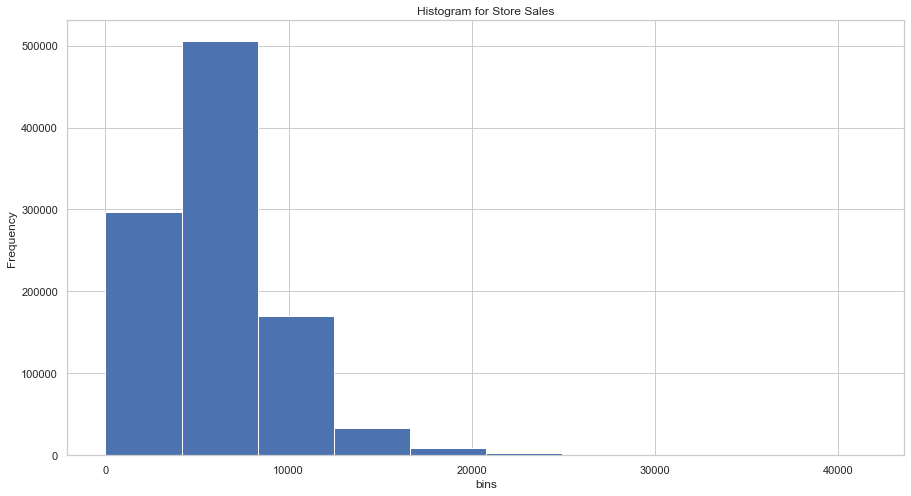

In [28]:
plt.figure(figsize=(15,8))
plt.hist(df_new["Sales"])
plt.title("Histogram for Store Sales")
plt.xlabel("bins")
plt.ylabel("Frequency")
plt.savefig('sales-histo.jpg',bbpx_inches='tight')
plt.show()

The histogram helps us understand the distribution of the data at a
high level. From the plot, we can see that the data range is from
0 to 40,000, but there is barely any data after 20,000. This indicates that
most of the stores have sales in the range 0–20,000, and just a few stores
have sales greater than 20,000. It might be worthwhile to remove these
outliers, as it helps the model learn better.

C:\Users\Hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  


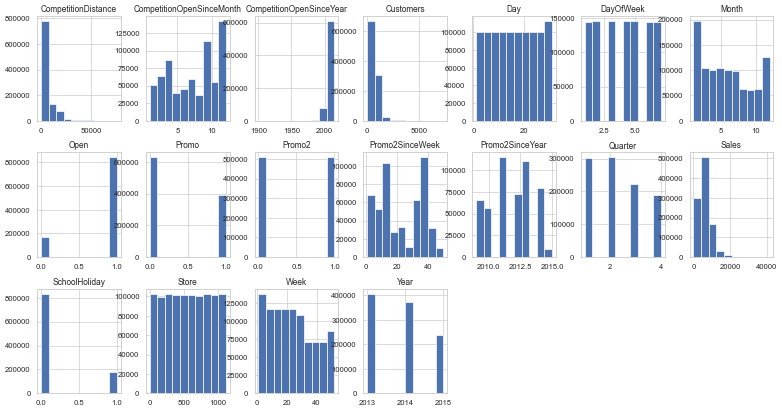

In [32]:
fig, ax = plt.subplots(figsize=(19,10), dpi=50)
df_new.hist(ax=ax, layout=(3,7), figsize=(20,10))

#(figsize=(20,10))
plt.title('Histogram distribution for the dataset')
plt.savefig('hist_dataset.jpg',bbox_inches='tight')

We can see that the features Promo, Promo2, School
Holiday, and Open are actually binary categorical features: they represent
two possible values similar to gender: Male or Female. Therefore, these
are actually categorical features but already encoded as numeric columns.
This is great; we won’t need to further process them, as machine learning models
understand only numeric values.
Promo2 is well distributed between the two distinct values, whereas
Promo has more records for ‘1’ and Open has most of the store records
as ‘1’. The distribution between the values for ‘Open’ makes sense, as the
stores will be open for most days except state holidays.
Customer numbers range from 0 to 2,000 for most stores. A few stores
have as many as 7000 daily customers, but these are outliers and we might
need to fix them before modeling.The next set of numeric variables are Promo2SinceWeek and
Promo2SinceYear; these show a relatively well-distributed feature.

In [53]:
target = ["Sales"]
numeric_columns = ["Customers","Open","Promo","Promo2",
"StateHoliday","SchoolHoliday","CompetitionDistance"]
categorical_columns = ["DayOfWeek","Quarter","Month","Year",
"StoreType","Assortment","Season"]
df_new.columns[(df_new.isnull().sum()/df_new.shape[0] * 100)>30]

Index(['CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [5]:
class NanTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    def fit(self, X, y=None):
        return self

    def transform(self,X):
        for i in X:
            if X[i].dtype==object:
                 X[i].fillna(X[i].mode(),inplace=True)
            else:
                X[i].fillna(X[i].mean(),inplace=True)
        return X
simple_features = Pipeline([
    ('nst', NanTransformer()),
])
df=simple_features.fit_transform(df_new)

In [83]:
#Replace nulls with the mode
#df_new["CompetitionDistance"]=df_new["CompetitionDistance"].fillna(df_new["CompetitionDistance"].mode()[0])
#Double check if we still see nulls for the column
df_new["CompetitionDistance"].isnull().sum()/df_new.shape[0] * 100

0.0

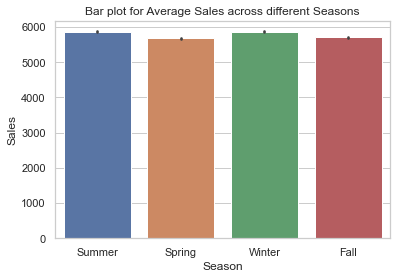

In [42]:
sns.set(style="whitegrid")
#Create the bar plot for Average Sales across different Seasons
ax = sns.barplot(x="Season", y="Sales", data=df_new)
ax.set_title("Bar plot for Average Sales across different Seasons")
ax.figure.savefig('Sales-season.jpg',bbox_inches='tight')

Sales across seasons barely seem to
differ

In [20]:
#Create the bar plot for Average Sales across different Seasons
ax = sns.barplot(x="Season", y="Sales", data=df_test)

ValueError: Could not interpret input 'Sales'

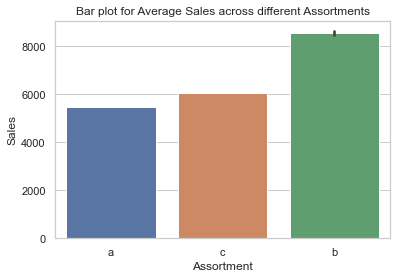

In [43]:
#Create the bar plot for Average Sales across different Assortments
ax = sns.barplot(x="Assortment", y="Sales", data=df_new)
ax.set_title("Bar plot for Average Sales across different Assortments")
ax.figure.savefig('Sales-assortments.jpg',bbox_inches='tight')

There seems to be an increasing trend for sales across
assortments. Stores with assortment “b” generally have the highest sales

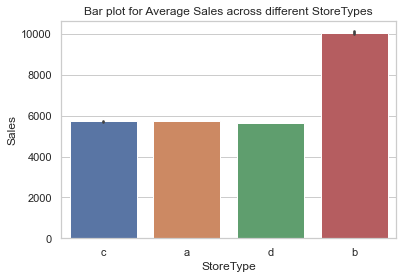

In [44]:
#Create the bar plot for Average Sales across different StoreTypes
ax = sns.barplot(x="StoreType", y="Sales", data=df_new)
ax.set_title("Bar plot for Average Sales across different StoreTypes")
ax.figure.savefig('Sales-storetype.jpg',bbox_inches='tight')

Store type also shows a unique relationship with sales across store types.
We can see fairly higher sales for “b” store types also.

However, further investigation is required to cheeck for skewness of the data. This is done using the count property of seaborn

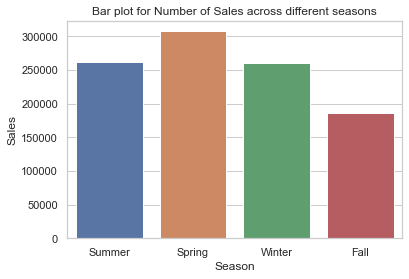

In [45]:
ax = sns.barplot(x="Season", y="Sales", data=df_new,estimator=np.size)
ax.set_title("Bar plot for Number of Sales across different seasons")
ax.figure.savefig('Sales-count-season.jpg',bbox_inches='tight')

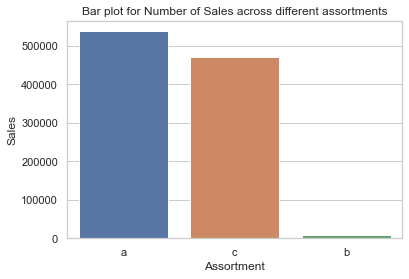

In [46]:
ax = sns.barplot(x="Assortment", y="Sales", data=df_new,estimator=np.size)
ax.set_title("Bar plot for Number of Sales across different assortments")
ax.figure.savefig('Sales-count-assortment.jpg',bbox_inches='tight')

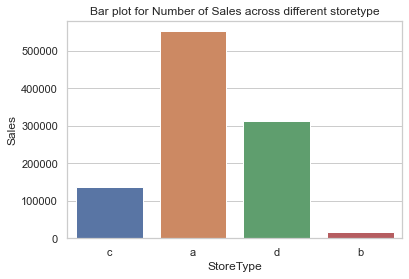

In [47]:
ax = sns.barplot(x="StoreType", y="Sales", data=df_new,estimator=np.size)
ax.set_title("Bar plot for Number of Sales across different storetype")
ax.figure.savefig('Sales-count-store.jpg',bbox_inches='tight')

We can notice that the distribution of data points across different
classes within a category is skewed. A simple check on StoreType and
Assortment reveals that b has a significantly lower number of stores or
data points in the dataset. Therefore, our initial understanding of the
relationships observed is not true.

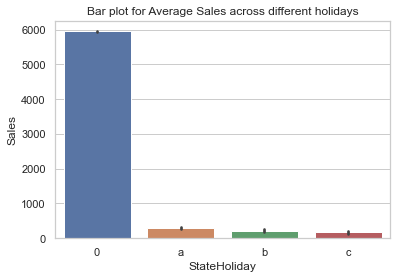

In [50]:

#Create the bar plot for Average Sales across different holidays
ax = sns.barplot(x="StateHoliday", y="Sales", data=df_new)
ax.set_title("Bar plot for Average Sales across different holidays")
ax.figure.savefig('Sales-holiday.jpg',bbox_inches='tight')

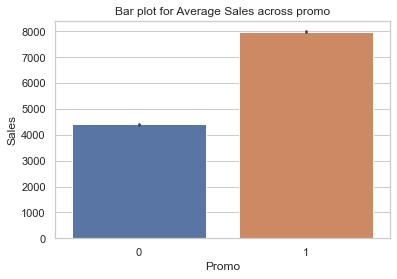

In [51]:
ax = sns.barplot(x="Promo", y="Sales", data=df_new)
ax.set_title("Bar plot for Average Sales across promo")
ax.figure.savefig('Sales-promo.jpg',bbox_inches='tight')

In [ ]:
#ax = sns.barplot(x="CompetitionDistance", y="Sales", data=df_new)
plt.scatter(df_new["CompetitionDistance"],df_new["Sales"])

In [20]:


class ColumnSelectTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.numeric_columns=["Open","Promo","Promo2","StateHoliday","SchoolHoliday","CompetitionDistance"]
        self.categorical_columns = ["DayOfWeek","Quarter","Month","Year","StoreType","Assortment","Season"]
    def fit(self, X, y=None):
        return self

    def transform(self,X):
        le = LabelEncoder()
        ohe = OneHotEncoder(sparse=False)
        temp = X[self.numeric_columns]
        for column in self.categorical_columns:
            a=le.fit_transform(X[column]).reshape(-1,1)
            column_names = [column+ "_"+ str(i) for i in le.classes_]
            temp_df=pd.DataFrame(ohe.fit_transform(a),columns =column_names)
            temp = pd.concat([temp,temp_df],axis=1)
        if 'Sales' in X.columns:
            temp['Sales']=X['Sales']
        if len(temp.loc[(temp['Customers']<7000) & (temp['Sales']<=2000) ])/len(temp)<0.05:
            temp=temp.loc[(temp['Customers']<7000) & (temp['Sales']<=2000) ]
        temp["StateHoliday"]= np.where(temp["StateHoliday"]== '0',0,1) #stateholiday should have 0 or 1, to indicate if there is holiday or not
        return temp
simple_features = Pipeline([
    ('cst', ColumnSelectTransformer()),
])

In [85]:
#a=simple_features.fit_transform(df_new)
temp=simple_features.fit_transform(df_new)

In [30]:
#Define a function that will intake the raw dataframe and thecolumn name and return a one hot encoded DF
def create_ohe(df, col):
    le = LabelEncoder()
    a=le.fit_transform(df[col]).reshape(-1,1)
    ohe = OneHotEncoder(sparse=False)
    column_names = [col+ "_"+ str(i) for i in le.classes_]
    return(pd.DataFrame(ohe.fit_transform(a),columns =column_names))

In [31]:
#Since the above function converts the column, one at a time
#We create a loop to create the final dataset with all features
temp = df_new[numeric_columns]
for column in categorical_columns:
    temp_df = create_ohe(df_new,column)
    temp = pd.concat([temp,temp_df],axis=1)

In [87]:
print("Shape of Data:",temp.shape)
print("Distinct Datatypes:",temp.dtypes.unique())

Shape of Data: (1017209, 45)
Distinct Datatypes: [dtype('int64') dtype('int32') dtype('float64')]


In [92]:

temp=temp.loc[(temp['Customers']<7000) & (temp['Sales']<=2000) ]

In [93]:
print(temp.columns[temp.dtypes=="object"])

Index(['StateHoliday'], dtype='object')


In [94]:
temp["StateHoliday"].unique()

array([0, 'a', 'b', 'c'], dtype=object)

stateholiday should have 0 or 1, to indicate if there is holiday or not

In [95]:
temp["StateHoliday"]= np.where(temp["StateHoliday"]== '0',0,1)
#One last check of the data type
temp.dtypes.unique()

array([dtype('int64'), dtype('int32'), dtype('float64')], dtype=object)

In [96]:
temp.head()

,Customers,Open,Promo,Promo2,StateHoliday,SchoolHoliday,CompetitionDistance,DayOfWeek_1,DayOfWeek_2,DayOfWeek_3,...,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c,Season_Fall,Season_Spring,Season_Summer,Season_Winter,Sales
5,0,0,0,0,1,0,1270.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0
12,0,0,0,0,1,0,1270.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0
19,0,0,0,0,1,0,1270.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0
26,0,0,0,0,1,0,1270.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0
33,0,0,0,0,1,0,1270.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0


In [22]:
## pipeline for processing
#pipe_1=make_pipeline(NanTransformer(),DateTransformer(),ColumnSelectTransformer())
## pipeline for prediction
#pipe_2=make_pipeline(StandardScaler(),RandomForestRegressor(n_estimators=200))
#temp_train=pipe_1.fit_transform(df_new)
#temp_test=pipe_1.fit_transform(df_test)
X_train, X_test, y_train, y_test = train_test_split(temp_train[temp_train.columns[:-1]],temp_train[temp_train.columns[-1]],test_size=0.2,random_state=1234)
x_train, x_val, y_train, y_val = train_test_split(X_train,y_train,test_size=0.1,random_state=1234)
pipe_2.fit(x_train,y_train)
#pipe_2.fit(temp_train[temp_train.columns[:-1]],temp_train[temp_train.columns[-1]])

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestregressor',
                 RandomForestRegressor(n_estimators=200))])

In [13]:
print(np.sqrt(mean_squared_error(pipe_2.predict(x_val),y_val)))
np.sqrt(mean_squared_error(pipe_2.predict(X_test),y_test))


1411.6767040556917


1402.6668757162106

In [17]:
#1402.6668757
np.sqrt(mean_squared_error(pipe_2.predict(X_test),y_test))/np.mean(y_test)

0.2430820528782231

In [70]:
np.random.seed(1234)
kfold = KFold(n_splits=5)

pipe= Pipeline([("scaler", StandardScaler()), ("forest", RandomForestRegressor(n_estimators=141))]) 
#pipe=Pipeline([('cst', ScalerTransformer()),("forest", RandomForestRegressor(n_estimators=141))])
#using pipeline gave me a higher means squared error


NameError: name 'ScalerTransformer' is not defined

In [7]:
class ScalerTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(X[X.columns[:-1]],X[X.columns[-1]],test_size=0.2,random_state=1234)
        return self

    def transform(self,X):
        scaler=StandardScaler()
        scaler.fit(self.X_train)
        X_train=scaler.transform(self.X_train)
        X_test=scaler.transform(self.X_test)
        x_train, x_val, y_train, y_val = train_test_split(X_train,self.y_train,test_size=0.1,random_state=1234)
    
        #X.fillna(0,inplace=True)
        return x_train, x_val, y_train, y_val,X_test,y_test



In [68]:
x_train, x_val, y_train, y_val,X_test,y_test=Pipeline([
    ('cst', ColumnSelectTransformer()),
]).fit_transform(temp)

In [73]:
np.random.seed(1234)
kfold = KFold(n_splits=5)
#pipe= Pipeline([("scaler", StandardScaler()), ("forest", RandomForestRegressor(n_estimators=141))]) 
pipe=Pipeline([('cst', ScalerTransformer()),("forest", RandomForestRegressor(n_estimators=141))])
#using pipeline gave me a higher means squared error
pipe

In [130]:
temp1=temp[temp.columns[:-1]]
scaler=StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(temp[temp.columns[:-1]],temp[temp.columns[-1]],test_size=0.2,random_state=1234)
#scaler.fit(X_train)
#X_train=scaler.transform(X_train)
#X_test=scaler.transform(X_test)

x_train, x_val, y_train, y_val = train_test_split(X_train,y_train,test_size=0.1,random_state=1234)

In [131]:
#Check the sizes of all newly created datasets
print("Shape of x_train:",x_train.shape)
print("Shape of x_val:",x_val.shape)
print("Shape of x_test:",X_test.shape)
print("Shape of y_train:",y_train.shape)
print("Shape of y_val:",y_val.shape)
print("Shape of y_test:",y_test.shape)

Shape of x_train: (732390, 44)
Shape of x_val: (81377, 44)
Shape of x_test: (203442, 44)
Shape of y_train: (732390,)
Shape of y_val: (81377,)
Shape of y_test: (203442,)


In [99]:
temp.shape

(1017209, 45)

In [142]:
#score=cross_val_score(pipe,temp,df_new[target],n_jobs=-1,cv=kfold)
np.random.seed(1234)
param={'n_estimators':range(100,200,10)}
#pipe=make_pipeline(StandardScaler(), 
                    #RandomizedSearchCV(RandomForestRegressor(),
                     #            param_distributions=param,
                      #           cv=kfold,
                       #          refit=True,scoring='neg_mean_squared_error'))
pipe=Pipeline([("scaler", StandardScaler()), ("forest",RandomForestRegressor(n_estimators=200))])
pipe.fit(x_train,y_train)
pipe.score(x_val,y_val)

0.9815233995095115

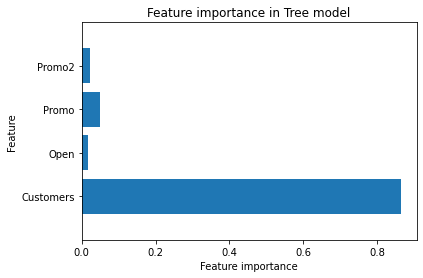

In [124]:
def plot_feature_importances(model,name):
    
    feature=pd.DataFrame({'imp':model.feature_importances_,'features':temp.columns[:-1]})
    feature=feature[feature['imp']>0.01]
    n_features =feature.shape[0]
    plt.barh(range(n_features),feature.imp, align='center')
    plt.yticks(np.arange(n_features), temp.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
    plt.title('Feature importance in Tree model')
    plt.savefig(name+'.jpg')
    return feature.features.values
features=plot_feature_importances(pipe['forest'],'feature_importance')

In [126]:
temp1=temp[['Customers', 'Promo', 'CompetitionDistance', 'StoreType_d']]
scaler=StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(temp1,temp[temp.columns[-1]],test_size=0.2,random_state=1234)
#scaler.fit(X_train)
#X_train=scaler.transform(X_train)
#X_test=scaler.transform(X_test)

x_train, x_val, y_train, y_val = train_test_split(X_train,y_train,test_size=0.1,random_state=1234)

In [ ]:


np.sqrt(mean_squared_error(pipe.predict(X_test),y_test))




In [51]:
pipe.fit(x_train,y_train)
np.sqrt(mean_squared_error(pipe.predict(x_val),y_val))


C:\Users\Hp\Anaconda3\lib\site-packages\sklearn\pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


26.735218083061152

In [45]:
np.sqrt(mean_squared_error(tree.predict(X_test),y_test))
#len(df_new[df_new.Sales==0])

24.973095650826913